# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# Reading Dataset

In [43]:
dataset = pd.read_csv('Immigration.csv')

# Exploratory Data Analysis on our dataset

In [3]:
#Total values
dataset.count()

Year               4380
District           4380
Neighbourhood      4380
Place_of_origin    4380
Amount             4380
dtype: int64

In [4]:
#Checking Null Values
dataset.isnull().sum()

Year               0
District           0
Neighbourhood      0
Place_of_origin    0
Amount             0
dtype: int64

In [5]:
dataset.describe()

,Year,Amount
count,4380.00000,4380.000000
mean,2020.00000,66.310274
std,0.81659,245.410230
min,2019.00000,0.000000
25%,2019.00000,1.000000
50%,2020.00000,5.000000
75%,2021.00000,19.000000
max,2021.00000,4199.000000


In [6]:
dataset.head()

,Year,District,Neighbourhood,Place_of_origin,Amount
0,2019,Ciutat Vella,el Raval,Andalusia,95
1,2019,Ciutat Vella,el Barri Gotic,Andalusia,64
2,2019,Ciutat Vella,la Barceloneta,Andalusia,41
3,2019,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",Andalusia,67
4,2019,Eixample,el Fort Pienc,Andalusia,41


In [7]:
dataset.tail()

,Year,District,Neighbourhood,Place_of_origin,Amount
4375,2021,Sant Marti,la Verneda i la Pau,Basque Country,12
4376,2021,Sant Marti,la Verneda i la Pau,Rioja,2
4377,2021,Sant Marti,la Verneda i la Pau,Ceuta,2
4378,2021,Sant Marti,la Verneda i la Pau,Melilla,2
4379,2021,Sant Marti,la Verneda i la Pau,Foreign countries,389


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4380 entries, 0 to 4379
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             4380 non-null   int64 
 1   District         4380 non-null   object
 2   Neighbourhood    4380 non-null   object
 3   Place_of_origin  4380 non-null   object
 4   Amount           4380 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 171.2+ KB


In [9]:
dataset.describe()

,Year,Amount
count,4380.00000,4380.000000
mean,2020.00000,66.310274
std,0.81659,245.410230
min,2019.00000,0.000000
25%,2019.00000,1.000000
50%,2020.00000,5.000000
75%,2021.00000,19.000000
max,2021.00000,4199.000000


In [10]:
dataset.columns

Index(['Year', 'District', 'Neighbourhood', 'Place_of_origin', 'Amount'], dtype='object')

In [11]:
print("Unique Years")
print(dataset.Year.unique(), end = "\n\n")

print("Unique Districts")
print(dataset.District.unique(), end = "\n\n")

print("Unique Neihghbourhoods")
print(dataset.Neighbourhood.unique(), end = "\n\n")

print("Unique Places of origin")
print(dataset.Place_of_origin.unique(), end = "\n\n")
#print(dataset.Amount.unique())

Unique Years
[2019 2020 2021]

Unique Districts
['Ciutat Vella' 'Eixample' 'Sants-Montjuic' 'Les Corts'
 'Sarria-Sant Gervasi' 'Gracia' 'Horta-Guinardo' 'Nou Barris'
 'Sant Andreu' 'Sant Marti']

Unique Neihghbourhoods
['el Raval' 'el Barri Gotic' 'la Barceloneta'
 'Sant Pere, Santa Caterina i la Ribera' 'el Fort Pienc'
 'la Sagrada Familia' "la Dreta de l'Eixample"
 "l'Antiga Esquerra de l'Eixample" "la Nova Esquerra de l'Eixample"
 'Sant Antoni' 'el Poble Sec' 'la Marina del Prat Vermell'
 'la Marina de Port' 'la Font de la Guatlla' 'Hostafrancs' 'la Bordeta'
 'Sants - Badal' 'Sants' 'les Corts' 'la Maternitat i Sant Ramon'
 'Pedralbes' 'Vallvidrera, el Tibidabo i les Planes' 'Sarria'
 'les Tres Torres' 'Sant Gervasi - la Bonanova' 'Sant Gervasi - Galvany'
 'el Putxet i el Farro' 'Vallcarca i els Penitents' 'el Coll' 'la Salut'
 'la Vila de Gracia' "el Camp d'en Grassot i Gracia Nova"
 'el Baix Guinardo' 'Can Baro' 'el Guinardo' "la Font d'en Fargues"
 'el Carmel' 'la Teixonera' 'San

In [12]:
dataset.nunique(dropna = True)

Year                 3
District            10
Neighbourhood       73
Place_of_origin     20
Amount             430
dtype: int64

# Plotting 

**Bar** **Graph** that shows how many immigrants were seen in the consecutive years.

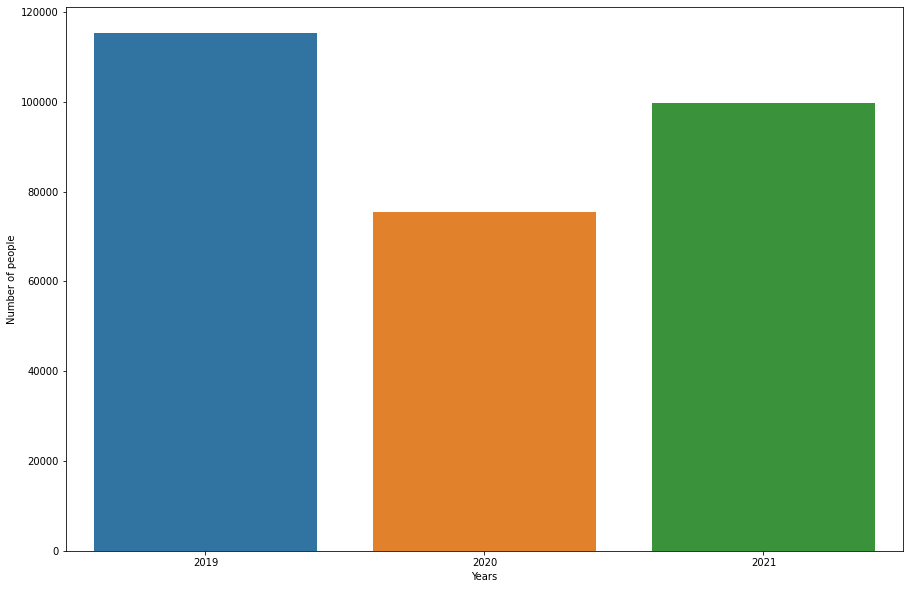

<Figure size 432x288 with 0 Axes>

In [13]:
year = dataset.groupby('Year').Amount.sum()
plt.figure(figsize=(15, 10))
ax = sb.barplot(x=year.index, y=year.values)
plt.xlabel("Years")
plt.ylabel("Number of people")
plt.show()
plt.clf()

**Bar** **Graph** that shows the districts in which the immigrants went to.

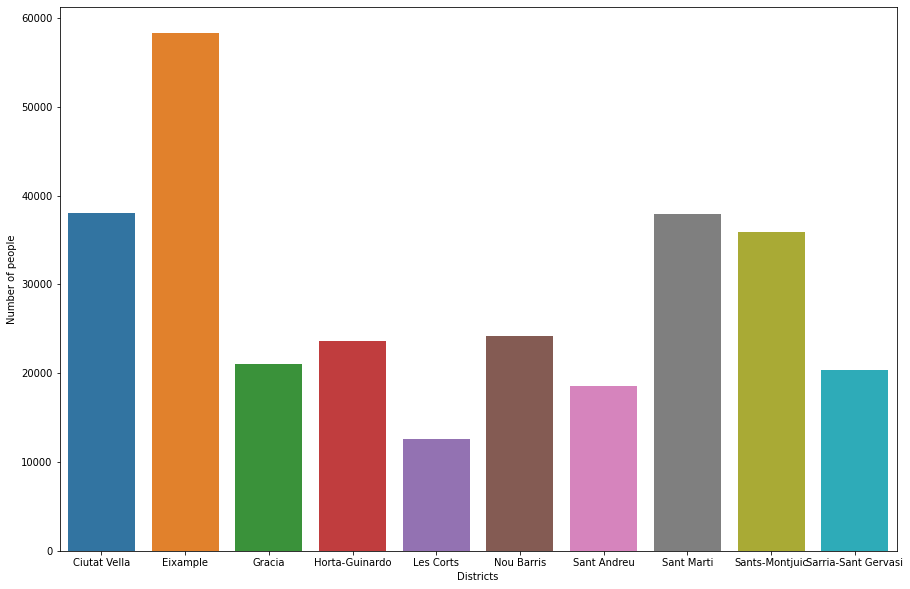

<Figure size 432x288 with 0 Axes>

In [14]:
dt = dataset.groupby('District').Amount.sum()
plt.figure(figsize=(15, 10))
ax = sb.barplot(x=dt.index, y=dt.values)
plt.xlabel("Districts")
plt.ylabel("Number of people")
plt.show()
plt.clf()

**Bar** **Graph** that shows the place of origin from where the immigrants came.

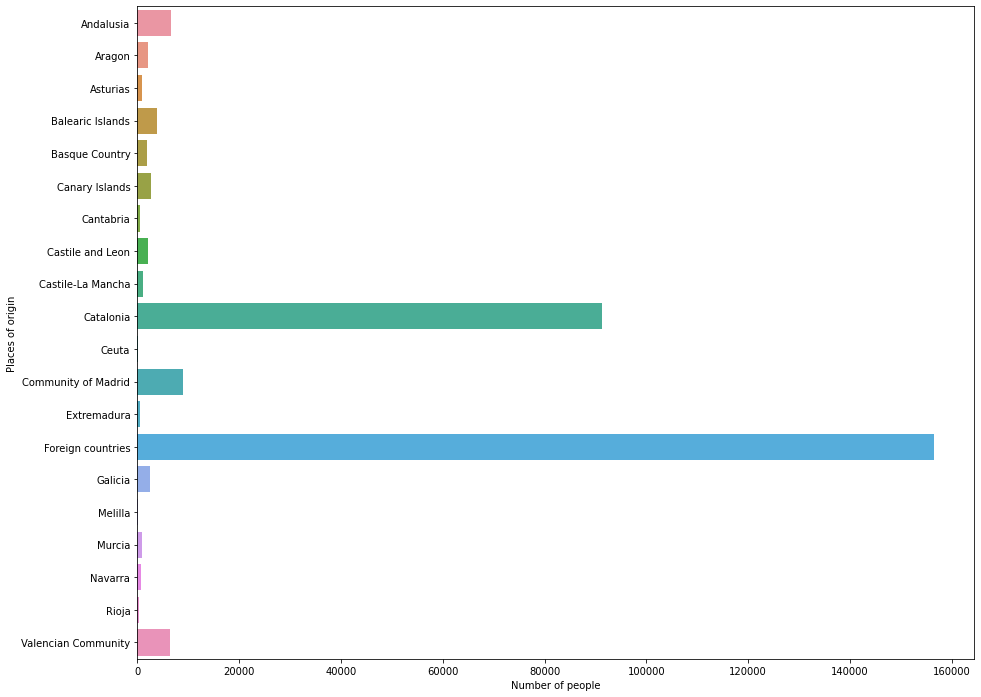

In [15]:
origin = dataset.groupby('Place_of_origin').Amount.sum()
plt.figure(figsize=(15, 12))
ax = sb.barplot(y=origin.index, x=origin.values)
plt.xlabel("Number of people")
plt.ylabel("Places of origin")
plt.show()
#plt.clf()

**Pie** **Chart** that shows number of people in each district

Text(0.5, 1.0, 'Pie Chart for People in each district')

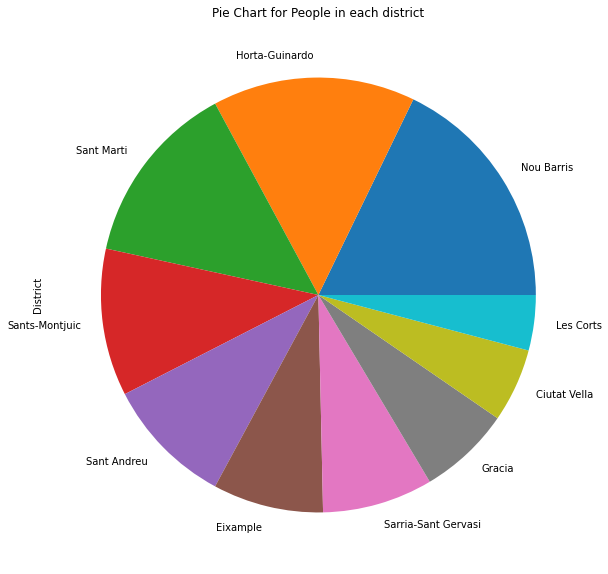

In [16]:
plt.figure(figsize=(10, 10))
top = dataset['District'].value_counts().sort_values(ascending=False).head(10)
top.plot(kind='pie')
plt.title('Pie Chart for People in each district')

**Pie** **Chart** that shows the number of people from different origin places

Text(0.5, 1.0, 'Pie Chart for people from various places of origin')

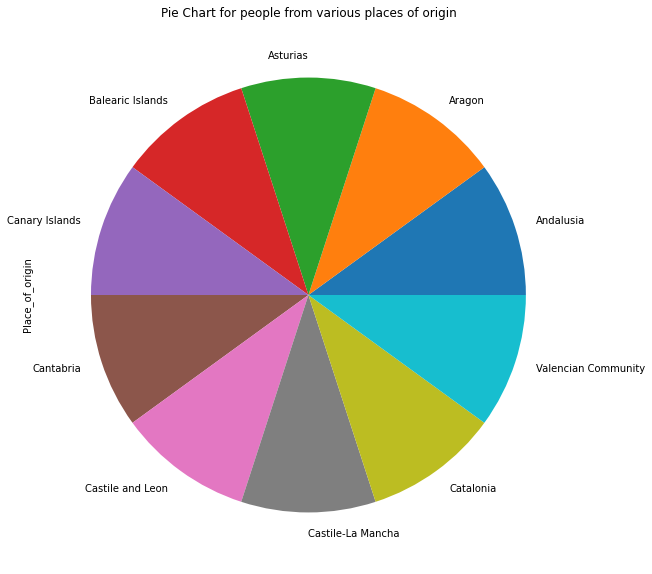

In [17]:
plt.figure(figsize=(10, 10))
top = dataset['Place_of_origin'].value_counts().sort_values(ascending=False).head(10)
top.plot(kind='pie')
plt.title('Pie Chart for people from various places of origin')

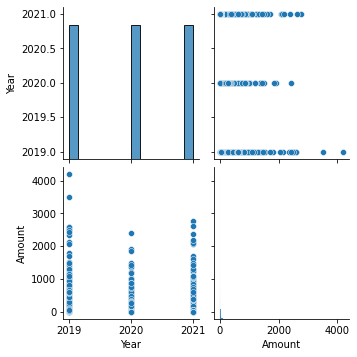

In [18]:
sb.pairplot(dataset)